# Analysis for Question 1: How does an institution's rank correlate with graduate salary outcomes?

In [2]:
# import needed packages
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr
from statsmodels.stats.proportion import proportions_ztest
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


In [3]:
# read in the cleaned and merged csv file
uni_rankings = pd.read_csv('merged&cleaned_university_rankings.csv', encoding='utf-8')
uni_rankings

,2024 Rank,School Name,Country,SIZE,AGE,Academic Reputation Score,Employer Reputation Score,Faculty Student Score,Employment Outcomes Score,Overall Score,Postgrad Salary Rank,Early Career Pay,Mid Career Pay,Percent of STEM Degrees
0,1,Massachusetts Institute of Technology,United States,M,5.0,100.0,100.0,100.0,100.0,100.0,1,110200.0,196900.0,66.0
1,4,Harvard University,United States,L,5.0,100.0,100.0,98.3,100.0,98.3,10,95600.0,177400.0,19.0
2,5,Stanford University,United States,L,5.0,100.0,100.0,100.0,100.0,98.1,6,102300.0,181200.0,48.0
3,10,University of California-Berkeley,United States,XL,5.0,100.0,100.0,20.5,98.7,90.4,20,90900.0,170100.0,44.0
4,11,University of Chicago,United States,L,5.0,99.1,95.4,92.5,98.3,90.3,61,84700.0,151000.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,1402,University of the Pacific,United States,M,5.0,2.2,3.7,34.3,10.8,NaN,161,75900.0,134800.0,20.0
178,1415,California State University-Los Angeles,United States,L,4.0,5.4,2.5,3.5,9.5,NaN,471,62600.0,114400.0,14.0
179,1416,California State University-Long Beach,United States,XL,4.0,4.0,2.8,8.1,9.6,NaN,258,67300.0,125000.0,17.0
180,1421,Illinois State University,United States,L,5.0,3.7,3.5,5.9,10.9,NaN,425,64000.0,116300.0,10.0


In [4]:
# check for missing values
print(uni_rankings.isnull().sum())

2024 Rank                     0
School Name                   0
Country                       0
SIZE                          0
AGE                           8
Academic Reputation Score     0
Employer Reputation Score     0
Faculty Student Score         0
Employment Outcomes Score     0
Overall Score                94
Postgrad Salary Rank          0
Early Career Pay              0
Mid Career Pay                0
Percent of STEM Degrees       0
dtype: int64


In [5]:
# impute mean for the missing values in the age column
uni_rankings['AGE'] = uni_rankings['AGE'].fillna(uni_rankings['AGE'].mean())

#### Build Bivariate Visualization between school rank and graduate salary

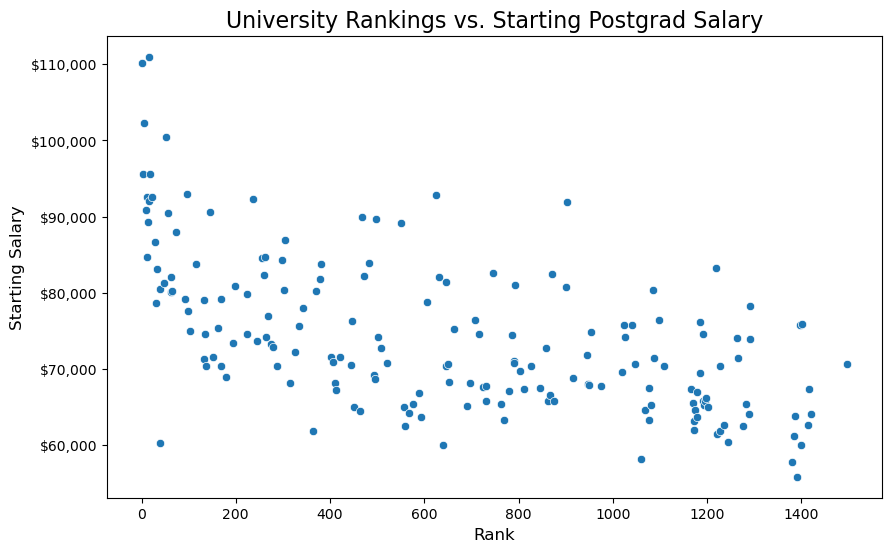

In [7]:
# build scatterplot
# function to format x-axis
def dollar_format(y, pos):
    # format the x-axis labels as dollars
    return f"${int(y):,}"

# create a scatter plot for Price (x) vs Points (y)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="2024 Rank", y="Early Career Pay", data=uni_rankings) # add transparency with alpha

# add formatting to the x-axis to display dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

# add titles and labels
plt.title("University Rankings vs. Starting Postgrad Salary", fontsize=16)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Starting Salary", fontsize=12)

plt.show()

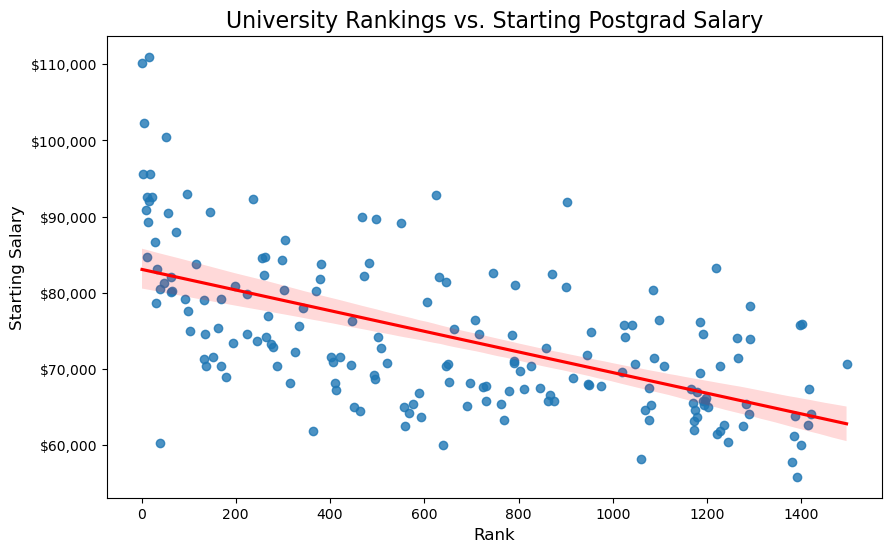

In [8]:
# function to format x-axis
def dollar_format(y, pos):
    # format the x-axis labels as dollars
    return f"${int(y):,}"

# create a scatter plot for Price (x) vs Points (y)
plt.figure(figsize=(10, 6))
sns.regplot(x="2024 Rank", y="Early Career Pay", data=uni_rankings, line_kws={"color": "red"})  # add trendline


# add formatting to the x-axis to display dollars
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

# add titles and labels
plt.title("University Rankings vs. Starting Postgrad Salary", fontsize=16)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Starting Salary", fontsize=12)

plt.show()




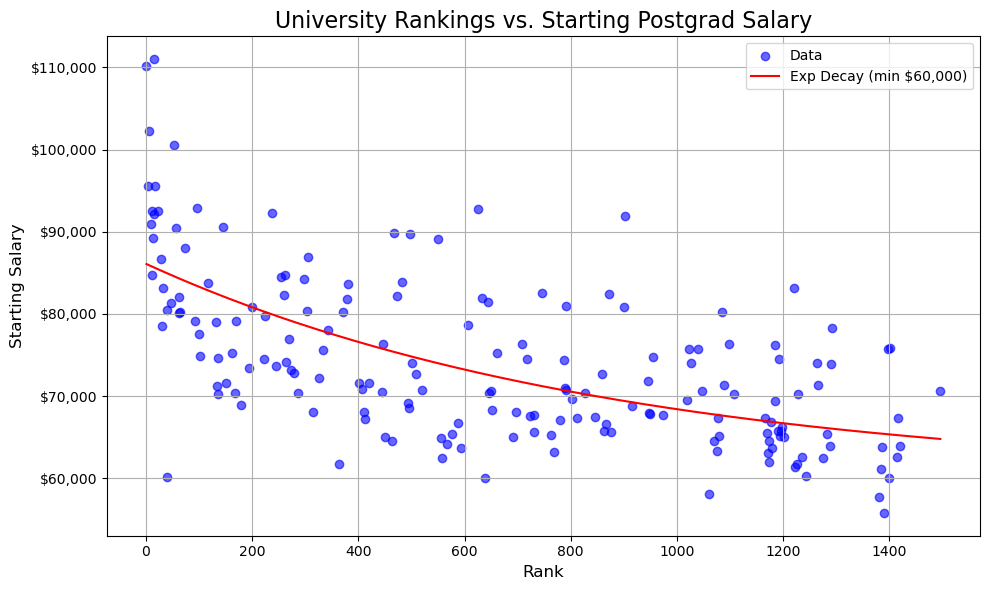

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.optimize import curve_fit

# Custom dollar formatting
def dollar_format(y, pos):
    return f"${int(y):,}"

# Input data
x = uni_rankings["2024 Rank"]
y = uni_rankings["Early Career Pay"]

# Define shifted exponential decay function with minimum at c
def shifted_exp_decay(x, a, b, c):
    return c + a * np.exp(-b * x)

# Fit curve with c fixed at 60,000
def fit_with_fixed_c(x, a, b):
    return shifted_exp_decay(x, a, b, 60000)

# Fit the curve
params, _ = curve_fit(fit_with_fixed_c, x, y, p0=(y.max()-60000, 0.01))

# Generate smooth x and predicted y values
x_fit = np.linspace(x.min(), x.max(), 500)
y_fit = shifted_exp_decay(x_fit, *params, c=60000)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="blue", alpha=0.6)
plt.plot(x_fit, y_fit, color='red', label='Exp Decay (min $60,000)')

plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))
plt.title("University Rankings vs. Starting Postgrad Salary", fontsize=16)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("Starting Salary", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Create a Jitterplot to compare Early Career and Mid Career Pay

/var/folders/lv/12d_mmh94n9_y9499p2jgc440000gn/T/ipykernel_34259/1664968751.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


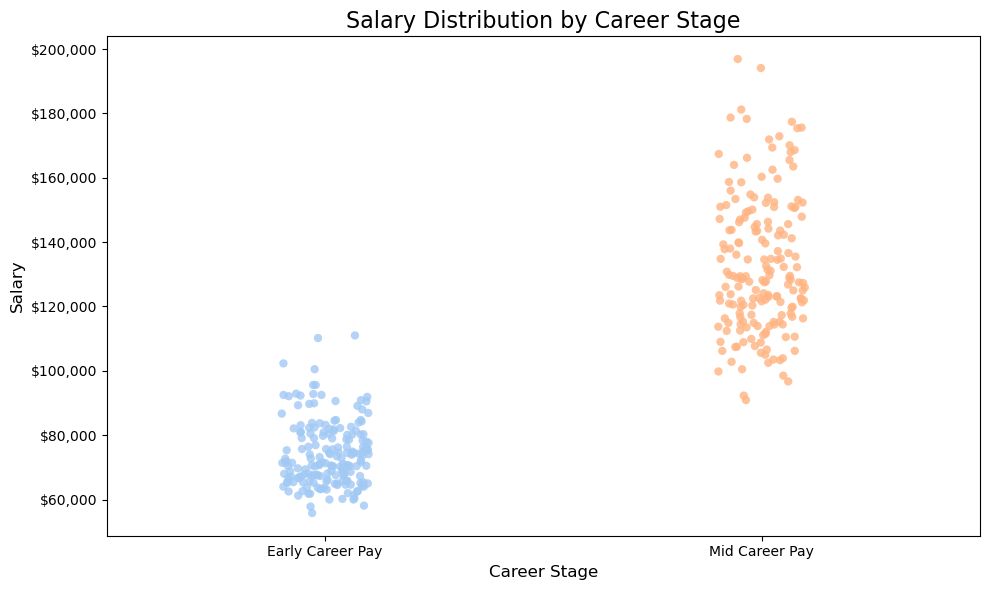

In [11]:
# Function to format y-axis as dollars
def dollar_format(x, pos):
    return f"${x:,.0f}"

# Reshape the data from wide to long format
# Assuming your DataFrame is called `uni_rankings`
pay_long = pd.melt(
    uni_rankings,
    value_vars=["Early Career Pay", "Mid Career Pay"],
    var_name="Pay Type",
    value_name="Salary"
)

# Create the jitter (strip) plot
plt.figure(figsize=(10, 6))
sns.stripplot(
    x="Pay Type",
    y="Salary",
    data=pay_long,
    size=6,
    jitter=True,
    alpha=0.8,
    palette="pastel"
)

# Format y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

# Add titles and labels
plt.title("Salary Distribution by Career Stage", fontsize=16)
plt.xlabel("Career Stage", fontsize=12)
plt.ylabel("Salary", fontsize=12)

plt.tight_layout()
plt.show()

### Machine Learning for Question 1

In [13]:
# create a linear regression 
X = uni_rankings[['2024 Rank']]
y = uni_rankings['Mid Career Pay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

y_pred = LinReg.predict(X_test)
print(y_pred)

[149336.03860498 144672.32732487 119168.48906737 132413.42910287
 119728.13442098 149922.33373733 148403.29634896 139129.17334623
 128469.26184884 133346.1713589  133612.66914633 118289.04636884
 139075.87378874 129881.70012225 144059.38241377 149709.13550739
 143339.8383877  125564.4359658  132573.32777534 142327.14679545
 113945.13243365 126950.22446046 119808.08375721 147390.6047567
 150508.62886969 126577.12755805 141101.25697325 149469.2874987
 117276.35477658 119941.33265093 114078.38132737 142620.29436162
 134145.6647212  136171.0479057  140008.61604476 147443.90431419
 127749.71782277 140061.91560225 139768.76803607 147363.95497796
 150188.83152477 145018.77444854 125671.03508078 133745.91804005
 128975.60764497 135611.40255209 128016.2156102  145791.6180321
 127909.61649523 119434.9868548  137823.3341878  118262.39659009
 150855.07599336 130014.94901596 144032.73263503]


In [14]:
LinReg.score(X_test, y_test)

0.28875806005415827

In [15]:
print("Intercept:", LinReg.intercept_)
print("Coefficients:", LinReg.coef_)

Intercept: 150988.32488707348
Coefficients: [-26.64977874]


# Analysis for Question 2: How does the percentage of STEM majors at an institution relate to its overall ranking and what factors influence this correlation?​

##### Make a Frequency Distribution chart of % of STEM Majors

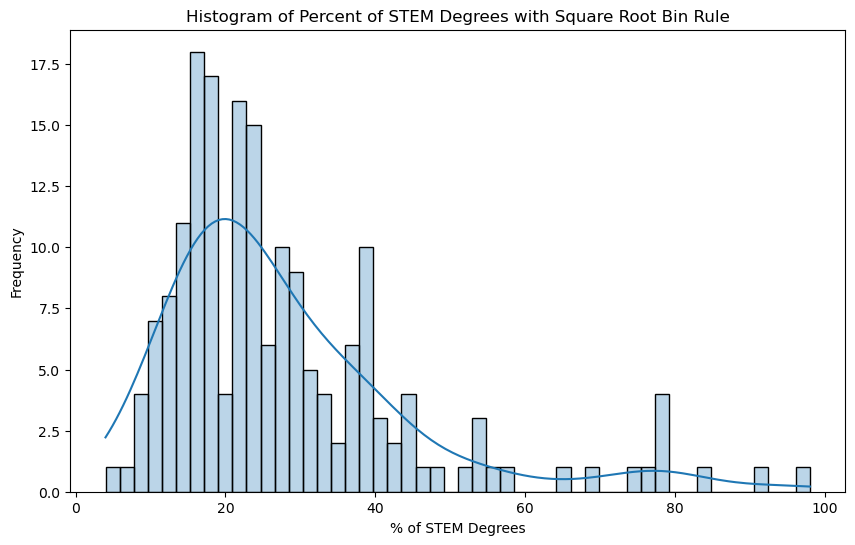

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(uni_rankings['Percent of STEM Degrees'], bins=50, kde=True, alpha=0.3) # add kde line, lighten the fill (alpha)
plt.title("Histogram of Percent of STEM Degrees with Square Root Bin Rule")
plt.xlabel("% of STEM Degrees")
plt.ylabel("Frequency")
plt.show()

##### create a scatter plot comparing % of stem degrees to overall rank

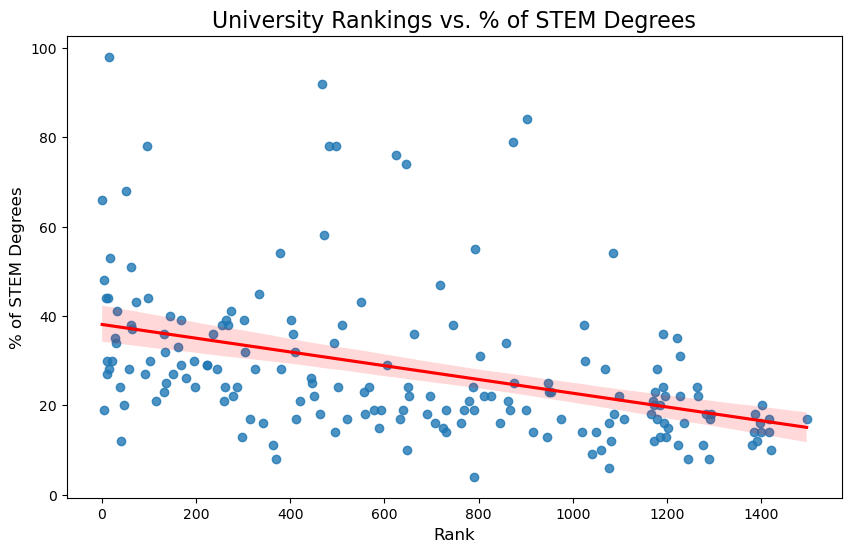

In [20]:

# create a scatter plot for Price (x) vs Points (y)
plt.figure(figsize=(10, 6))
sns.regplot(x="2024 Rank", y="Percent of STEM Degrees", data=uni_rankings, line_kws={"color": "red"})  # add trendline


# add titles and labels
plt.title("University Rankings vs. % of STEM Degrees", fontsize=16)
plt.xlabel("Rank", fontsize=12)
plt.ylabel("% of STEM Degrees", fontsize=12)

plt.show()

##### create a linear regression model between % of stem degrees and overall rank

In [22]:
# 1. Prepare X and y
X = uni_rankings["2024 Rank"].values.reshape(-1, 1)
y = uni_rankings["Percent of STEM Degrees"].values

# 2. Fit the model
model = LinearRegression()
model.fit(X, y)

# 3. Make predictions
y_pred = model.predict(X)

# 4. Calculate R²
r2 = r2_score(y, y_pred)
print(f"R² Score: {r2:.4f}")


R² Score: 0.1628


##### use machine learning to run the same linear regression model on train and test data

In [24]:
# Create the size mapping dictionary
size_mapping = {
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4
}

# Apply the mapping to the 'SIZE' column
uni_rankings['SIZE'] = uni_rankings['SIZE'].map(size_mapping)

In [25]:
# Prepare X and y
X = uni_rankings["2024 Rank"].values.reshape(-1, 1)  
y = uni_rankings["Percent of STEM Degrees"].values  

# Split the data into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the model to the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Calculate R² and Mean Absolute Error (MAE)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Output the results
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

R² Score: -0.0141
Mean Absolute Error: 11.1760


##### Use Machine Learning to use 5 of the variables to predict % of STEM score

In [27]:
# create a linear regression 
X = uni_rankings.drop(columns = ['School Name', 'Country', 'Faculty Student Score', 'Overall Score', 'Percent of STEM Degrees', 'Employer Reputation Score', 'Employment Outcomes Score', 'Postgrad Salary Rank', 'Early Career Pay'])
y = uni_rankings['Percent of STEM Degrees']

# Now match y to X
y = uni_rankings.loc[X.index, 'Percent of STEM Degrees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

y_pred = LinReg.predict(X_test)

r2_score = LinReg.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')


R^2 Score: 0.27169032505033963


##### Use Machine Learning to use 9 of the variables to predict % of stem score

In [29]:
# create a linear regression 
X = uni_rankings.drop(columns = ['School Name', 'Country', 'Faculty Student Score', 'Overall Score', 'Percent of STEM Degrees'])
y = uni_rankings['Percent of STEM Degrees']

# Now match y to X
y = uni_rankings.loc[X.index, 'Percent of STEM Degrees']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

y_pred = LinReg.predict(X_test)

r2_score = LinReg.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')


R^2 Score: 0.5398104287825315


### Classification Modeling with % STEM Degrees put into 3 bins

###### Test 1

In [32]:
# Create a copy to work with
STEM_bins = uni_rankings.copy()

# Create categorical bins for STEM Degrees
bins = [0, 20, 40, 100]  
labels = ['Low STEM (0-20%)', 'Medium STEM (20-40%)', 'High STEM (40-100%)']

uni_rankings['STEM_Category'] = pd.cut(uni_rankings['Percent of STEM Degrees'], bins=bins, labels=labels, include_lowest=True)


# Define features (X) and target (y)
X = uni_rankings.drop(columns = ['School Name', 'Country', 'Faculty Student Score', 'Overall Score', 'Percent of STEM Degrees', 'STEM_Category'])
y = uni_rankings['STEM_Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple classification model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.6181818181818182
Classification Report:                       precision    recall  f1-score   support

 High STEM (40-100%)       0.50      0.71      0.59         7
    Low STEM (0-20%)       0.54      0.72      0.62        18
Medium STEM (20-40%)       0.76      0.53      0.63        30

            accuracy                           0.62        55
           macro avg       0.60      0.66      0.61        55
        weighted avg       0.66      0.62      0.62        55



##### Test 2

In [34]:
# Create a copy to work with
STEM_bins = uni_rankings.copy()

# Create categorical bins for STEM Degrees
bins = [0, 20, 60, 100]  
labels = ['Low STEM (0-20%)', 'Medium STEM (20-60%)', 'High STEM (60-100%)']

uni_rankings['STEM_Category'] = pd.cut(uni_rankings['Percent of STEM Degrees'], bins=bins, labels=labels, include_lowest=True)


# Define features (X) and target (y)
X = uni_rankings.drop(columns = ['School Name', 'Country', 'Faculty Student Score', 'Overall Score', 'Percent of STEM Degrees', 'STEM_Category'])
y = uni_rankings['STEM_Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple classification model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.6545454545454545
Classification Report:                       precision    recall  f1-score   support

 High STEM (60-100%)       0.33      0.33      0.33         3
    Low STEM (0-20%)       0.54      0.72      0.62        18
Medium STEM (20-60%)       0.79      0.65      0.71        34

            accuracy                           0.65        55
           macro avg       0.55      0.57      0.55        55
        weighted avg       0.68      0.65      0.66        55



##### Test 3

In [36]:
# Create a copy to work with
STEM_bins = uni_rankings.copy()

# Create categorical bins for STEM Degrees
bins = [0, 33, 67, 100]  
labels = ['Low STEM (0-33%)', 'Medium STEM (33-67%)', 'High STEM (67-100%)']

uni_rankings['STEM_Category'] = pd.cut(uni_rankings['Percent of STEM Degrees'], bins=bins, labels=labels, include_lowest=True)


# Define features (X) and target (y)
X = uni_rankings.drop(columns = ['School Name', 'Country', 'Faculty Student Score', 'Overall Score', 'Percent of STEM Degrees', 'STEM_Category'])
y = uni_rankings['STEM_Category']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build a simple classification model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.7454545454545455
Classification Report:                       precision    recall  f1-score   support

 High STEM (67-100%)       0.60      1.00      0.75         3
    Low STEM (0-33%)       0.88      0.82      0.85        44
Medium STEM (33-67%)       0.22      0.25      0.24         8

            accuracy                           0.75        55
           macro avg       0.57      0.69      0.61        55
        weighted avg       0.77      0.75      0.75        55



### Old Question 3: Which ‘score’ column is the best predictor of overall rank?​ -> discarding for new question below

In [38]:
"""
# Select the two variables
x = uni_rankings['Academic Reputation Score']
y = uni_rankings['2024 Rank']

# Perform Spearman correlation test
correlation, p_value = spearmanr(x, y)

# Print results
print(f'Spearman correlation coefficient (rho): {correlation}')
print(f'p-value: {p_value}')

# Set significance level
alpha = 0.05

# Interpret
if p_value < alpha:
    print('The result is statistically significant. Academic Reputation Score is correlated with Rank (monotonic relationship).')
else:
    print('The result is not significant. No strong monotonic correlation between Academic Reputation Score and Rank.')
"""

"\n# Select the two variables\nx = uni_rankings['Academic Reputation Score']\ny = uni_rankings['2024 Rank']\n\n# Perform Spearman correlation test\ncorrelation, p_value = spearmanr(x, y)\n\n# Print results\nprint(f'Spearman correlation coefficient (rho): {correlation}')\nprint(f'p-value: {p_value}')\n\n# Set significance level\nalpha = 0.05\n\n# Interpret\nif p_value < alpha:\n    print('The result is statistically significant. Academic Reputation Score is correlated with Rank (monotonic relationship).')\nelse:\n    print('The result is not significant. No strong monotonic correlation between Academic Reputation Score and Rank.')\n"

# New Question 3: Do small schools have a higher probability of having a higher ranking than super large schools?​

In [40]:
# Define Top 25% Rank cutoff
rank_cutoff25 = np.percentile(uni_rankings['2024 Rank'], 25)

# Create binary success variable: 1 if Top 25%, else 0
uni_rankings['TopRanked'] = (uni_rankings['2024 Rank'] <= rank_cutoff25).astype(int)

# Filter small schools (S = 1) and super large schools (XL = 4)
small_schools = uni_rankings[uni_rankings['SIZE'] == 1]
med_schools = uni_rankings[uni_rankings['SIZE'] == 2]
large_schools = uni_rankings[uni_rankings['SIZE'] == 3]
xl_schools = uni_rankings[uni_rankings['SIZE'] == 4]

# Get number of "top ranked" schools and total schools in each group
successes25 = np.array([
    small_schools['TopRanked'].sum(),  # how many small schools in top 25%
    xl_schools['TopRanked'].sum()       # how many XL schools in top 25%
])

n_obs25 = np.array([
    small_schools['TopRanked'].count(),  # total small schools
    xl_schools['TopRanked'].count()      # total XL schools
])

# Perform two-proportion z-test
stat, p_value = proportions_ztest(successes25, n_obs25)

# Print results
print(f'z-statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret Test Results
alpha = 0.05
if p_value < alpha:
    print("Statistically significant: Small schools have a different probability of being top ranked compared to XL schools.")
else:
    print("Not statistically significant: No difference in probability between small and XL schools.")

z-statistic: -1.8551543860668986
p-value: 0.0635741832629683
Not statistically significant: No difference in probability between small and XL schools.


#### Run hypothesis test again comparing small to xl with 10% top ranked

In [42]:
# Define Top 10% Rank cutoff
rank_cutoff10 = np.percentile(uni_rankings['2024 Rank'], 10)

# Create binary success variable: 1 if Top 10%, else 0
uni_rankings['TopRanked'] = (uni_rankings['2024 Rank'] <= rank_cutoff10).astype(int)

#refilter the schools
small_schools = uni_rankings[uni_rankings['SIZE'] == 1]
xl_schools = uni_rankings[uni_rankings['SIZE'] == 4]

# Get number of "top ranked" schools and total schools in each group
successes10 = np.array([
    small_schools['TopRanked'].sum(),  # how many small schools in top 10%
    xl_schools['TopRanked'].sum()       # how many large schools in top 10%
])

n_obs10 = np.array([
    small_schools['TopRanked'].count(),  # total small schools
    xl_schools['TopRanked'].count()      # total large schools
])

# Perform two-proportion z-test
stat, p_value = proportions_ztest(successes10, n_obs10)

# Print results
print(f'z-statistic: {stat}')
print(f'p-value: {p_value}')

# Interpret Test Results
alpha = 0.05
if p_value < alpha:
    print("Statistically significant: Small schools have a different probability of being top ranked compared to XL schools.")
else:
    print("Not statistically significant: No difference in probability between small and XL schools.")

z-statistic: -0.0866233658062736
p-value: 0.930970892481549
Not statistically significant: No difference in probability between small and XL schools.


#### Run hypothesis test again comparing small to large

In [44]:
# Define Top 25% Rank cutoff
rank_cutoff25 = np.percentile(uni_rankings['2024 Rank'], 25)

# Create binary success variable: 1 if Top 25%, else 0
uni_rankings['TopRanked'] = (uni_rankings['2024 Rank'] <= rank_cutoff25).astype(int)

# Filter small schools (S = 1) and super large schools (XL = 4)
small_schools = uni_rankings[uni_rankings['SIZE'] == 1]
med_schools = uni_rankings[uni_rankings['SIZE'] == 2]
large_schools = uni_rankings[uni_rankings['SIZE'] == 3]
xl_schools = uni_rankings[uni_rankings['SIZE'] == 4]

# Get number of "top ranked" schools and total schools in each group
successes = np.array([
    small_schools['TopRanked'].sum(),  # how many small schools in top 25%
    large_schools['TopRanked'].sum()       # how many large schools in top 25%
])

n_obs = np.array([
    small_schools['TopRanked'].count(),  # total small schools
    large_schools['TopRanked'].count()      # total large schools
])

# Perform two-proportion z-test
stat, p_value = proportions_ztest(successes, n_obs)

# Print results
print(f'z-statistic: {stat:.4f}')
print(f'p-value: {p_value}')

# Interpret Test Results
alpha = 0.05
if p_value < alpha:
    print("Statistically significant: Small schools have a different probability of being top ranked compared to Large schools.")
else:
    print("Not statistically significant: No difference in probability between small and Large schools.")

z-statistic: -0.3533
p-value: 0.7238901020439636
Not statistically significant: No difference in probability between small and Large schools.


#### run hypothesis test again comparing large to small with a top rank of 50%

In [46]:
# Define Top 50% Rank cutoff
rank_cutoff50 = np.percentile(uni_rankings['2024 Rank'], 50)

# Create binary success variable: 1 if Top 50%, else 0
uni_rankings['TopRanked'] = (uni_rankings['2024 Rank'] <= rank_cutoff50).astype(int)

# Filter small schools (S = 1) and super large schools (XL = 4)
small_schools = uni_rankings[uni_rankings['SIZE'] == 1]
med_schools = uni_rankings[uni_rankings['SIZE'] == 2]
large_schools = uni_rankings[uni_rankings['SIZE'] == 3]
xl_schools = uni_rankings[uni_rankings['SIZE'] == 4]

# Get number of "top ranked" schools and total schools in each group
successes50 = np.array([
    small_schools['TopRanked'].sum(),  # how many small schools in top 25%
    large_schools['TopRanked'].sum()       # how many large schools in top 25%
])

n_obs50 = np.array([
    small_schools['TopRanked'].count(),  # total small schools
    large_schools['TopRanked'].count()      # total large schools
])

# Perform two-proportion z-test
stat, p_value = proportions_ztest(successes50, n_obs50)

# Print results
print(f'z-statistic: {stat:.4f}')
print(f'p-value: {p_value}')

# Interpret Test Results
alpha = 0.05
if p_value < alpha:
    print("Statistically significant: Small schools have a different probability of being top ranked compared to Large schools.")
else:
    print("Not statistically significant: No difference in probability between small and Large schools.")

z-statistic: -1.0157
p-value: 0.30977682807099016
Not statistically significant: No difference in probability between small and Large schools.


#### Make a grouped bar chart to visualize how many of each school size is in the top 25% or not

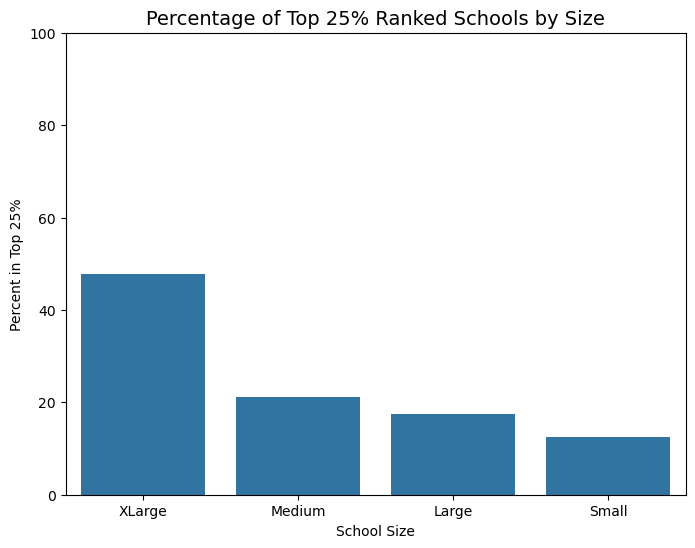

In [48]:
# Re-Map size values from numbers (1–4) to labels
size_mapping = {1: 'Small', 2: 'Medium', 3: 'Large', 4: 'XLarge'}
uni_rankings['SIZE'] = uni_rankings['SIZE'].map(size_mapping)

# Create binary column: is this school top 25% ranked or not
rank_cutoff = np.percentile(uni_rankings['2024 Rank'].dropna(), 25)
uni_rankings['Top_25_Percent'] = (uni_rankings['2024 Rank'] <= rank_cutoff).astype(int)

# Group and calculate proportion of top schools per size
grouped = uni_rankings.groupby('SIZE')['Top_25_Percent'].agg(['mean', 'count']).reset_index()
grouped['Percent_Top_25'] = grouped['mean'] * 100

# Sort the grouped data by Percent_Top_25 in descending order
grouped_sorted = grouped.sort_values('Percent_Top_25', ascending=False)

# Plot the sorted bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='SIZE', y='Percent_Top_25', data=grouped_sorted)

# Formatting
plt.title("Percentage of Top 25% Ranked Schools by Size", fontsize=14)
plt.ylabel("Percent in Top 25%")
plt.xlabel("School Size")
plt.ylim(0, 100)


plt.show()

#### Boxplot of 2024 Rank to size category

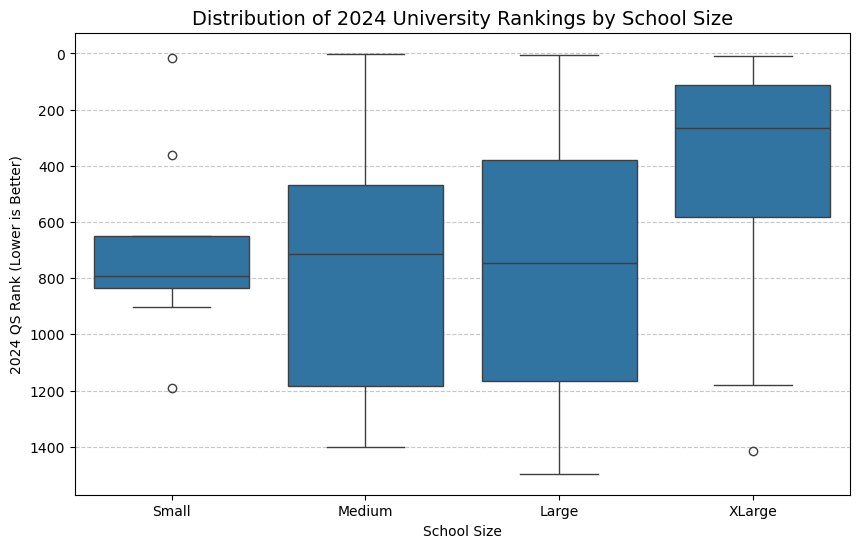

In [50]:
# Define the order for the 'SIZE' categories
size_order = ['Small', 'Medium', 'Large', 'XLarge']

# Convert 'SIZE' to a categorical type with the specified order
uni_rankings['SIZE'] = pd.Categorical(uni_rankings['SIZE'], categories=size_order, ordered=True)

# Create the boxplot of rankings by size
plt.figure(figsize=(10, 6))
sns.boxplot(x='SIZE', y='2024 Rank', data=uni_rankings, order=size_order)

# Add titles and labels
plt.title("Distribution of 2024 University Rankings by School Size", fontsize=14)
plt.xlabel("School Size")
plt.ylabel("2024 QS Rank (Lower is Better)")
plt.gca().invert_yaxis()  # Invert y-axis since lower ranks are better

plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()